# NAM Assignment 1 - Analysis of Kane and Abel

## Team Members

In [1]:
# Team Members
## 1. Aaditya S Goel - PES1UG20CS001
## 2. Pooshpal Baheti - PES1UG20CS283
## 3. Prateek Pangal Rao - PES1UG20CS303
## 4. Rahul Ramesh - PES1UG20CS319

## Standard Imports

In [2]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from nltk.tokenize import sent_tokenize

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/prateekrao/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
file = open("KaneAndAbel.txt", "r", encoding='utf-8')
data = file.read()

## 1. Implementation

### a. List of Characters

In [5]:
characters = [
    "William_Kane", "Anne_Kane", "Henry_Osborne", "Matthew_Lester", "Abel_Rosnovski", "Florcia_Koskiewicz",
    "Davis_Leroy", "George_Novak", "Zaphia", "Florentyna_Rosnovski", "Richard_Kane", "Baron_Rosnovski", "Helena_Koskiewicz",
    'Alan_Lloyd', 'Desmond_Pacey', "Richie_Kane_Sr", "Grandmother_Kane", "Grandmother_Cabot", "Tony_Simmons", "Melanie_Leroy",
    "Leon_Koskiewicz", "David_Maxton", "Charles_Lester", "Peter_Parfitt"
]

In [6]:
print(len(characters))

24


Pre-processing to replace characters with tokens

In [7]:
##William Kane
# data = data.replace("William Kane", "William_Kane")
data = data.replace("William", "William_Kane")

##Grandmother_Kane
data = data.replace("Grandmother Kane", "Grandmother_Kane")

##Grandmother Cabot
data = data.replace("Grandmother Cabot", "Grandmother_Cabot")

##Peter Parfitt
data = data.replace("Parfitt", "Peter_Parfitt")
data = data.replace("Parfitts", "Peter_Parfitt")

##Tony Simmons
data = data.replace("Tony", "Tony_Simmons")

##Melanie_Leroy
data = data.replace("Melanie", "Melanie_Leroy")

##David Maxton
data = data.replace("Maxton", "David_Maxton")

##Charles Lester
data = data.replace("Charles", "Charles_Lester")

##Richard Kane Sr.
data = data.replace("Richie", "Richie_Kane_Sr")

##Baron Rosnovski
data = data.replace("Baron Rosnovski", "Baron_Rosnovski")

##Anne Kane
data = data.replace("Anne", "Anne_Kane")
# data = data.replace("Anne Kane", "Anne_Kane")

##Henry Osborne
data = data.replace("Henry", "Henry_Osborne")
# data = data.replace("Henry Osborne", "Henry_Osborne")
data = data.replace("Mr. Osborne", "Henry_Osborne")
data = data.replace("Congressman Osborne", "Henry_Osborne")

#Alan Lloyd
data=data.replace('Alan', 'Alan_Lloyd')

#Desmond Pacey
data=data.replace('Desmond', 'Desmond_Pacey')
data=data.replace('Pacey', 'Desmond_Pacey')

##Matthew Lester
data = data.replace("Matthew", "Matthew_Lester")
# data = data.replace("Matthew Lester", "Matthew_Lester")

##Charles Lester
data = data.replace("Charles", "Charles_Lester")


##Abel Rosnovski
data = data.replace("Abel", "Abel_Rosnovski")
# data = data.replace("Abel Rosnovski", "Abel_Rosnovski")
# data = data.replace("Baron Abel Rosnovski", "Abel_Rosnovski")
data = data.replace("Wladek", "Abel_Rosnovski")
# data = data.replace("Wladek Koskiewicz", "Abel_Rosnovski")

##Florcia_Koskiewicz
data = data.replace("Florcia", "Florcia_Koskiewicz")
# data = data.replace("Florcia Koskiewicz", "Florcia_Koskiewicz")

##Davis Elroy
data = data.replace("Davis", "Davis_Leroy")
# data = data.replace("Leroy", "Davis_Leroy")
# data = data.replace("Davis Elroy", "Davis_Elroy")

##Helenda Koskiewicz
data=data.replace('Helena Koskiewicz', 'Helena_Koskiewicz')
data=data.replace('Helena', 'Helena_Koskiewicz')

##George Novak
data = data.replace("George", "George_Novak")
# data = data.replace("George Novak", "George_Novak")
data = data.replace("Novak", "George_Novak")

##Zaphia
data = data.replace("Zaphia", "Zaphia")

##Florentyna Rosnovski
data = data.replace("Florentyna", "Florentyna_Rosnovski")
# data = data.replace("Florentyna Rosnovski", "Florentyna_Rosnovski")

##Richard Kane
# data = data.replace("Richard Kane", "Richard_Kane")
data = data.replace("Richard", "Richard_Kane")

##Leon_Koskiewicz
data = data.replace("Leon", "Leon_Koskiewicz")

In [8]:
sentences = sent_tokenize(data)

In [9]:
print(len(sentences))

11912


#### b. Creating the Social Graph

In [10]:
char_df = pd.DataFrame(0, index=characters, columns=characters)
char_df

William_Kane  Anne_Kane  Henry_Osborne  Matthew_Lester  \
William_Kane                     0          0              0               0   
Anne_Kane                        0          0              0               0   
Henry_Osborne                    0          0              0               0   
Matthew_Lester                   0          0              0               0   
Abel_Rosnovski                   0          0              0               0   
Florcia_Koskiewicz               0          0              0               0   
Davis_Leroy                      0          0              0               0   
George_Novak                     0          0              0               0   
Zaphia                           0          0              0               0   
Florentyna_Rosnovski             0          0              0               0   
Richard_Kane                     0          0              0               0   
Baron_Rosnovski                  0          0              0               0   
Helena_Koskiewicz                0          0              0               0   
Alan_Lloyd                       0          0              0               0   
Desmond_Pacey                    0          0              0               0   
Richie_Kane_Sr                   0          0              0               0   
Grandmother_Kane                 0          0              0               0   
Grandmother_Cabot                0          0              0               0   
Tony_Simmons                     0          0              0               0   
Melanie_Leroy                    0          0              0               0   
Leon_Koskiewicz                  0          0              0               0   
David_Maxton                     0          0              0               0   
Charles_Lester                   0          0              0               0   
Peter_Parfitt                    0          0              0               0   

                      Abel_Rosnovski  Florcia_Koskiewicz  Davis_Leroy  \
William_Kane                       0                   0            0   
Anne_Kane                          0                   0            0   
Henry_Osborne                      0                   0            0   
Matthew_Lester                     0                   0            0   
Abel_Rosnovski                     0                   0            0   
Florcia_Koskiewicz                 0                   0            0   
Davis_Leroy                        0                   0            0   
George_Novak                       0                   0            0   
Zaphia                             0                   0            0   
Florentyna_Rosnovski               0                   0            0   
Richard_Kane                       0                   0            0   
Baron_Rosnovski                    0                   0            0   
Helena_Koskiewicz                  0                   0            0   
Alan_Lloyd                         0                   0            0   
Desmond_Pacey                      0                   0            0   
Richie_Kane_Sr                     0                   0            0   
Grandmother_Kane                   0                   0            0   
Grandmother_Cabot                  0                   0            0   
Tony_Simmons                       0                   0            0   
Melanie_Leroy                      0                   0            0   
Leon_Koskiewicz                    0                   0            0   
David_Maxton                       0                   0            0   
Charles_Lester                     0                   0            0   
Peter_Parfitt                      0                   0            0   

                      George_Novak  Zaphia  Florentyna_Rosnovski  ...  \
William_Kane                     0       0                     0  ...   
Anne_Kane                        0       0       

In [11]:
index = 0
n = len(sentences)
for sentence in sentences:
    index += 1
    array = []
    if (index <= 1): lower_bound = 1
    else: lower_bound = index-1
    #slicing excludes upper_bound element
    if (index >= n-2): upper_bound = n
    else: upper_bound = index+2

    #creating array with 8 lines from above and below sentence
    array = sentences[lower_bound:upper_bound]
    array_chars = []
    for char in characters:
        for sent in array:
            if char in sent and char not in array_chars:
                array_chars.append(char)

    for char1 in characters:
        for char2 in characters:
            if (char1 != char2) and (char1 in sentence) and (char2 in array_chars):
                char_df[char1][char2] += 1
                char_df[char2][char1] += 1
char_df

William_Kane  Anne_Kane  Henry_Osborne  Matthew_Lester  \
William_Kane                     0        168            203             381   
Anne_Kane                      168          0            170              14   
Henry_Osborne                  203        170              0              15   
Matthew_Lester                 381         14             15               0   
Abel_Rosnovski                 223          0            145               6   
Florcia_Koskiewicz               2          2              0               0   
Davis_Leroy                     10          0              6               1   
George_Novak                    29          1             23               1   
Zaphia                           2          0              2               0   
Florentyna_Rosnovski            27          0              8               1   
Richard_Kane                   119          0              7              15   
Baron_Rosnovski                  0          0              0               0   
Helena_Koskiewicz                1          0              0               0   
Alan_Lloyd                     220         66             67              30   
Desmond_Pacey                    1          0              4               0   
Richie_Kane_Sr                  86         95             40               6   
Grandmother_Kane                41          2              0               9   
Grandmother_Cabot               17          0              0               3   
Tony_Simmons                   190          2              7              22   
Melanie_Leroy                    2          0              0               2   
Leon_Koskiewicz                  1          0              0               0   
David_Maxton                     5          0              2               1   
Charles_Lester                  96          4              6              27   
Peter_Parfitt                   94          0              4               2   

                      Abel_Rosnovski  Florcia_Koskiewicz  Davis_Leroy  \
William_Kane                     223                   2           10   
Anne_Kane                          0                   2            0   
Henry_Osborne                    145                   0            6   
Matthew_Lester                     6                   0            1   
Abel_Rosnovski                     0                  74          125   
Florcia_Koskiewicz                74                   0            0   
Davis_Leroy                      125                   0            0   
George_Novak                     285                   0            2   
Zaphia                           123                   2            1   
Florentyna_Rosnovski             189                   0            2   
Richard_Kane                      32                   0            0   
Baron_Rosnovski                   11                   0            0   
Helena_Koskiewicz                 17                  10            0   
Alan_Lloyd                         6                   0            1   
Desmond_Pacey                     40                   0           12   
Richie_Kane_Sr                     0                   0            0   
Grandmother_Kane                   0                   0            0   
Grandmother_Cabot                  0                   0            0   
Tony_Simmons                       6                   0            0   
Melanie_Leroy                     93                   0           14   
Leon_Koskiewicz                   99                  12            0   
David_Maxton                      37                   0            3   
Charles_Lester                     9                   0            1   
Peter_Parfitt                     11                   0            0   

                      George_Novak  Zaphia  Florentyna_Rosnovski  ...  \
William_Kane                    29       2                    27  ...   
Anne_Kane                        1       0       

In [12]:
G = nx.Graph()
G = nx.from_pandas_adjacency(char_df)

In [77]:
print("Number of nodes in the graph:", len(G.nodes()))
print("Nodes:", G.nodes())
print()
print("Number of edges in the graph:", len(G.edges()))
print("Edges:", G.edges(data=True))

Number of nodes in the graph: 24
Nodes: ['William_Kane', 'Anne_Kane', 'Henry_Osborne', 'Matthew_Lester', 'Abel_Rosnovski', 'Florcia_Koskiewicz', 'Davis_Leroy', 'George_Novak', 'Zaphia', 'Florentyna_Rosnovski', 'Richard_Kane', 'Baron_Rosnovski', 'Helena_Koskiewicz', 'Alan_Lloyd', 'Desmond_Pacey', 'Richie_Kane_Sr', 'Grandmother_Kane', 'Grandmother_Cabot', 'Tony_Simmons', 'Melanie_Leroy', 'Leon_Koskiewicz', 'David_Maxton', 'Charles_Lester', 'Peter_Parfitt']

Number of edges in the graph: 123
Edges: [('William_Kane', 'Anne_Kane', {'weight': 168}), ('William_Kane', 'Henry_Osborne', {'weight': 203}), ('William_Kane', 'Matthew_Lester', {'weight': 381}), ('William_Kane', 'Abel_Rosnovski', {'weight': 223}), ('William_Kane', 'Florcia_Koskiewicz', {'weight': 2}), ('William_Kane', 'Davis_Leroy', {'weight': 10}), ('William_Kane', 'George_Novak', {'weight': 29}), ('William_Kane', 'Zaphia', {'weight': 2}), ('William_Kane', 'Florentyna_Rosnovski', {'weight': 27}), ('William_Kane', 'Richard_Kane', {'we

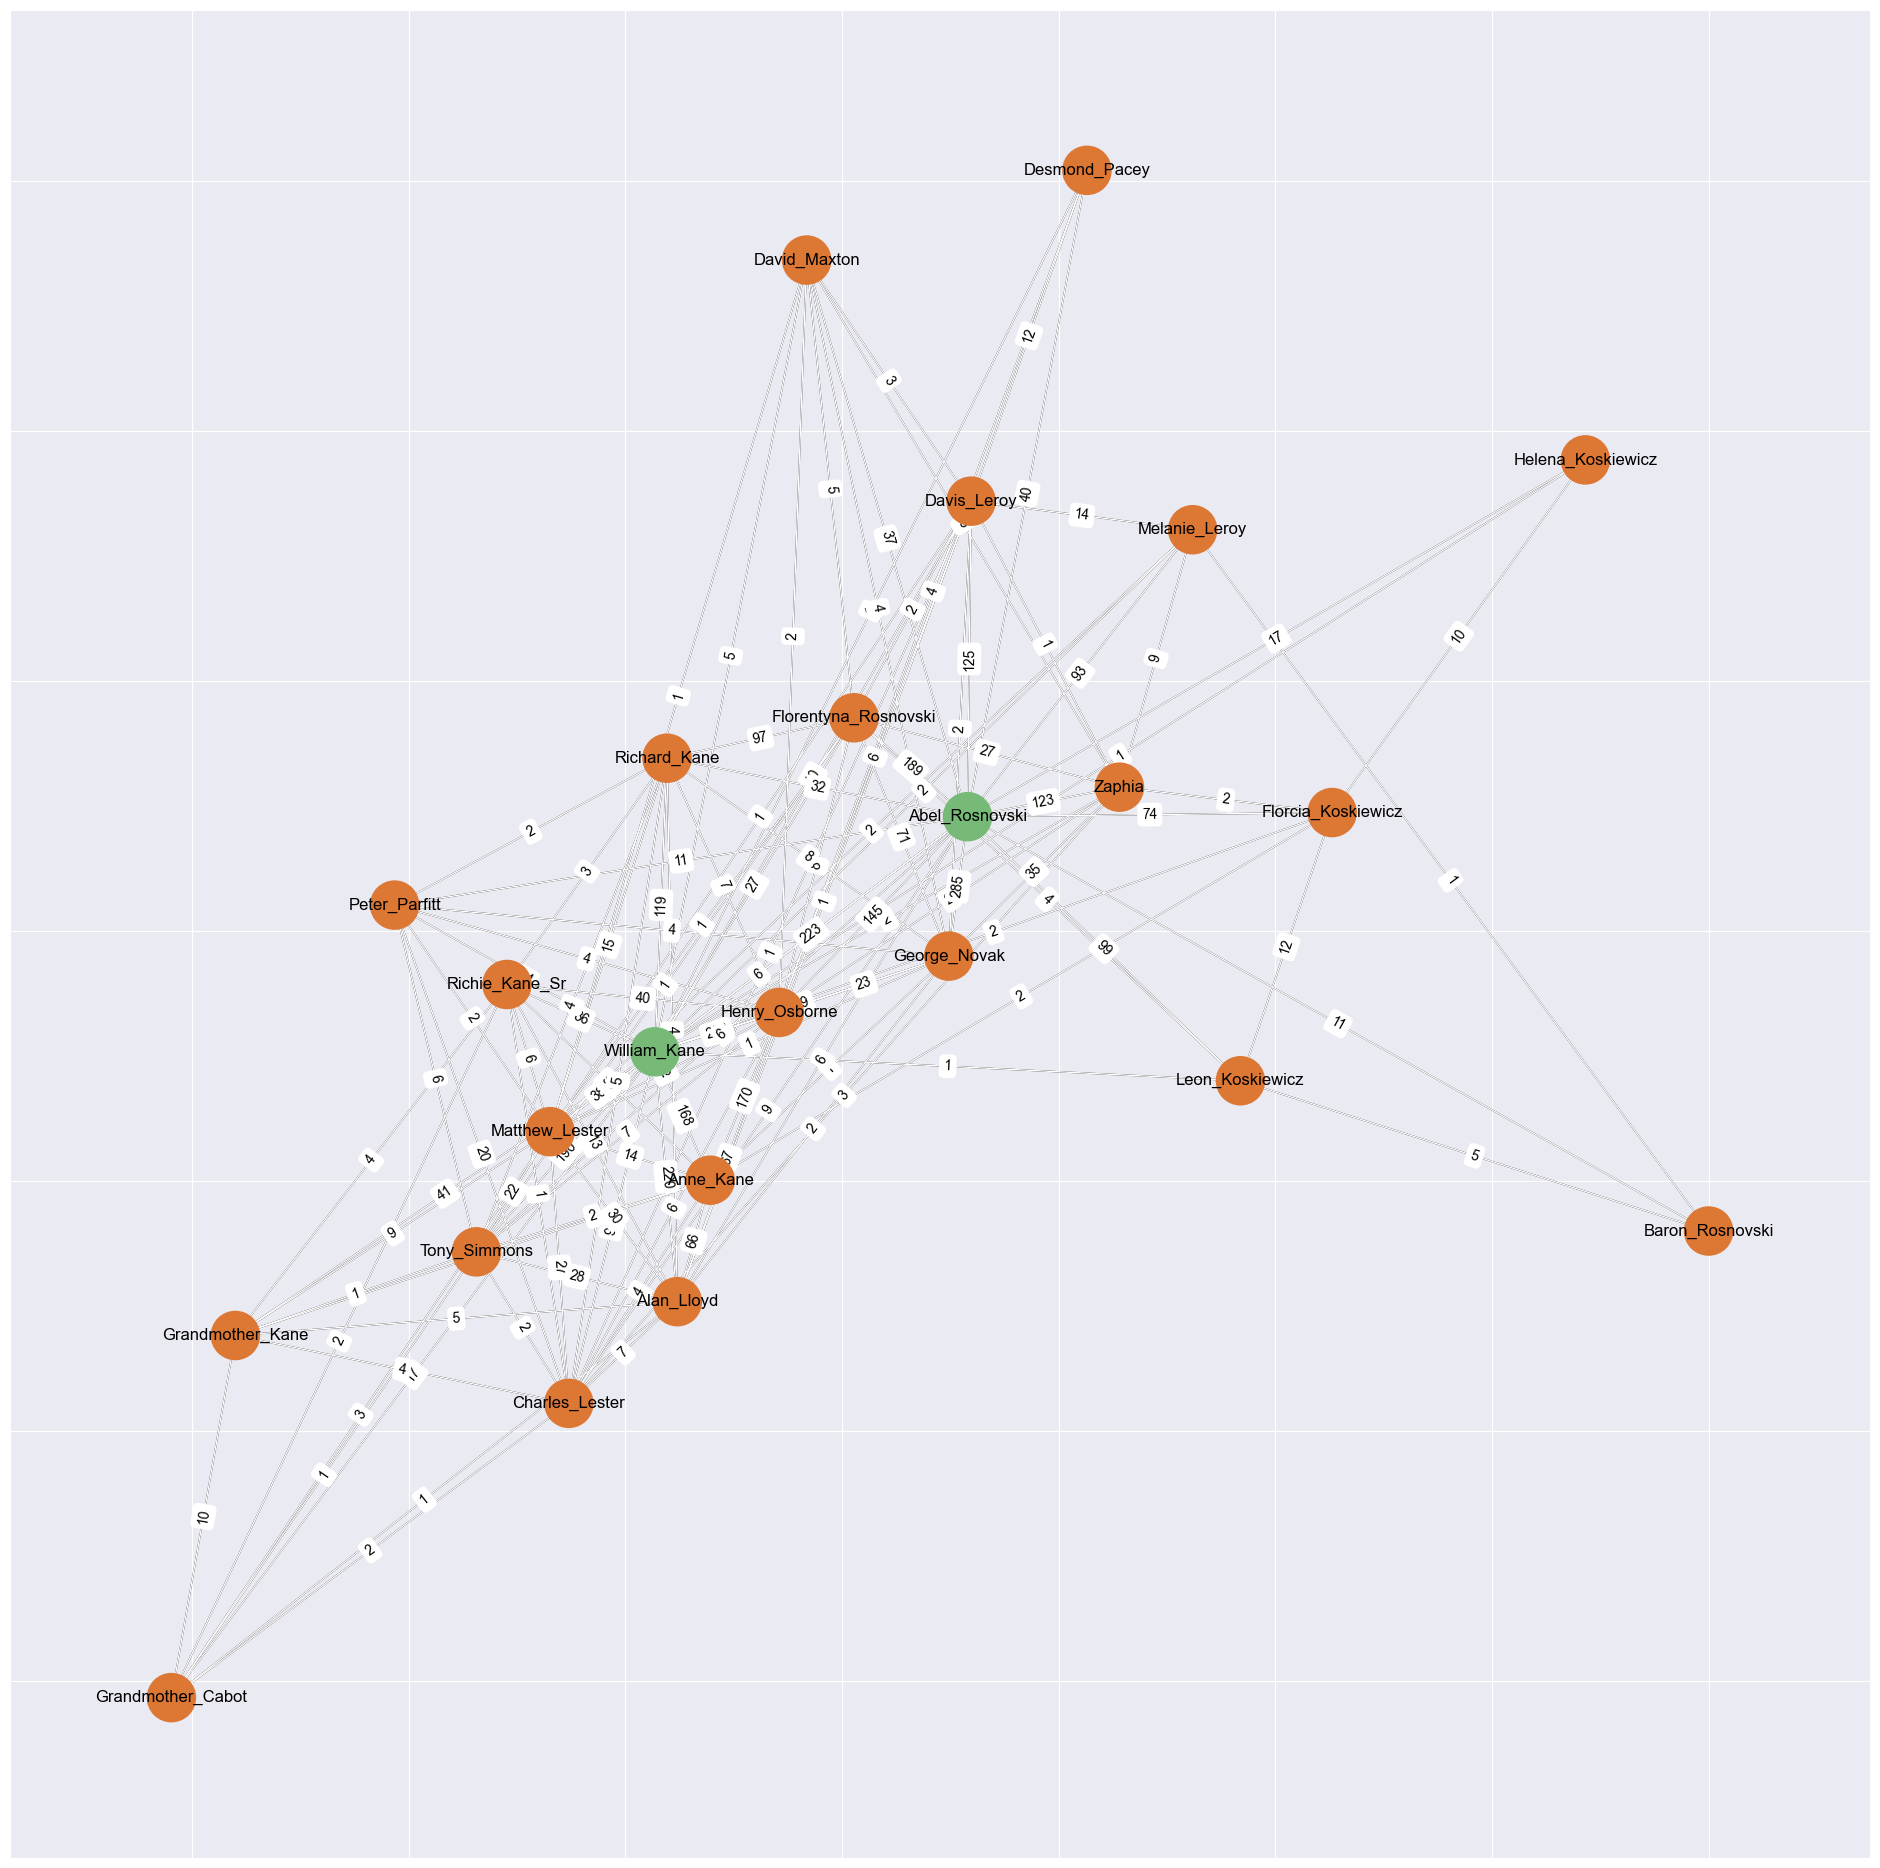

In [78]:
plt.figure(3, figsize=(24,24))
pos = nx.fruchterman_reingold_layout(G, k=1)

main_char = ["William_Kane", "Abel_Rosnovski"]
node_colors = ['#77BA77' if entry in main_char else  '#DD7734' for entry in char_df]

nx.draw_networkx(G, pos=pos, node_size = 1200, font_size=12, node_color=node_colors)
nx.draw_networkx_edges(G, pos=pos, edge_color='#FFFFFF', width=1)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels, font_size=10)
plt.show()

### c. Centrality Analysis

#### 1. Degree Centrality

In [79]:
list(G.edges(data=True))

[('William_Kane', 'Anne_Kane', {'weight': 168}),
 ('William_Kane', 'Henry_Osborne', {'weight': 203}),
 ('William_Kane', 'Matthew_Lester', {'weight': 381}),
 ('William_Kane', 'Abel_Rosnovski', {'weight': 223}),
 ('William_Kane', 'Florcia_Koskiewicz', {'weight': 2}),
 ('William_Kane', 'Davis_Leroy', {'weight': 10}),
 ('William_Kane', 'George_Novak', {'weight': 29}),
 ('William_Kane', 'Zaphia', {'weight': 2}),
 ('William_Kane', 'Florentyna_Rosnovski', {'weight': 27}),
 ('William_Kane', 'Richard_Kane', {'weight': 119}),
 ('William_Kane', 'Helena_Koskiewicz', {'weight': 1}),
 ('William_Kane', 'Alan_Lloyd', {'weight': 220}),
 ('William_Kane', 'Desmond_Pacey', {'weight': 1}),
 ('William_Kane', 'Richie_Kane_Sr', {'weight': 86}),
 ('William_Kane', 'Grandmother_Kane', {'weight': 41}),
 ('William_Kane', 'Grandmother_Cabot', {'weight': 17}),
 ('William_Kane', 'Tony_Simmons', {'weight': 190}),
 ('William_Kane', 'Melanie_Leroy', {'weight': 2}),
 ('William_Kane', 'Leon_Koskiewicz', {'weight': 1}),
 (

In [80]:
from operator import itemgetter

degc = nx.degree_centrality(G)
degc_list = sorted(degc.items(), key=itemgetter(1), reverse=True)

In [81]:
degc_list

[('William_Kane', 0.9565217391304348),
 ('Abel_Rosnovski', 0.8260869565217391),
 ('Matthew_Lester', 0.7391304347826086),
 ('Henry_Osborne', 0.6956521739130435),
 ('Charles_Lester', 0.6086956521739131),
 ('Alan_Lloyd', 0.5652173913043478),
 ('Davis_Leroy', 0.5217391304347826),
 ('George_Novak', 0.5217391304347826),
 ('Tony_Simmons', 0.5217391304347826),
 ('Florentyna_Rosnovski', 0.4782608695652174),
 ('Richard_Kane', 0.4782608695652174),
 ('Anne_Kane', 0.43478260869565216),
 ('Zaphia', 0.43478260869565216),
 ('Richie_Kane_Sr', 0.3913043478260869),
 ('Grandmother_Kane', 0.34782608695652173),
 ('David_Maxton', 0.34782608695652173),
 ('Peter_Parfitt', 0.34782608695652173),
 ('Grandmother_Cabot', 0.30434782608695654),
 ('Florcia_Koskiewicz', 0.2608695652173913),
 ('Melanie_Leroy', 0.2608695652173913),
 ('Leon_Koskiewicz', 0.21739130434782608),
 ('Desmond_Pacey', 0.17391304347826086),
 ('Baron_Rosnovski', 0.13043478260869565),
 ('Helena_Koskiewicz', 0.13043478260869565)]

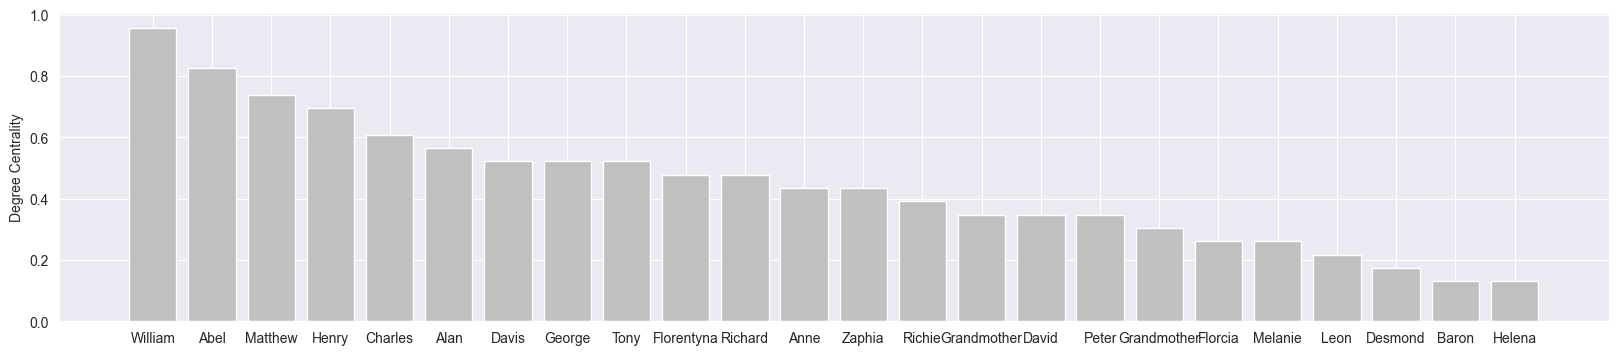

In [82]:
people = list(zip(*degc_list))[0]
people_first = [i.split("_")[0] for i in people]
score = list(zip(*degc_list))[1]
x_pos = np.arange(len(people))
plt.figure(figsize=(20, 4))
plt.bar(x_pos, score,align='center', color ='silver')
plt.xticks(x_pos, people_first)
plt.ylabel('Degree Centrality')
plt.show()

#### 2. Betweenness Centrality

In [83]:
bet = nx.betweenness_centrality(G)
betw_list = sorted(bet.items(), key=itemgetter(1), reverse=True)

In [84]:
betw_list

[('William_Kane', 0.19204780726519854),
 ('Abel_Rosnovski', 0.15905640253466338),
 ('Matthew_Lester', 0.05572808833678398),
 ('Henry_Osborne', 0.03892025848547587),
 ('Charles_Lester', 0.026990400903444383),
 ('Davis_Leroy', 0.016974088713219142),
 ('Alan_Lloyd', 0.016812535290796158),
 ('Tony_Simmons', 0.01509975531714662),
 ('Florentyna_Rosnovski', 0.015046427002948743),
 ('Anne_Kane', 0.014354727398205657),
 ('Zaphia', 0.013405797101449275),
 ('George_Novak', 0.012565091912917999),
 ('Melanie_Leroy', 0.011198945981554678),
 ('Florcia_Koskiewicz', 0.009519104084321474),
 ('Leon_Koskiewicz', 0.008344312692138778),
 ('Richard_Kane', 0.006855825334086203),
 ('Richie_Kane_Sr', 0.0035996612083568596),
 ('Baron_Rosnovski', 0.0013175230566534913),
 ('Grandmother_Kane', 0.0010038270907836125),
 ('Peter_Parfitt', 0.0008344312692138777),
 ('Grandmother_Cabot', 0.00043917435221783044),
 ('David_Maxton', 0.00043917435221783044),
 ('Helena_Koskiewicz', 0.0),
 ('Desmond_Pacey', 0.0)]

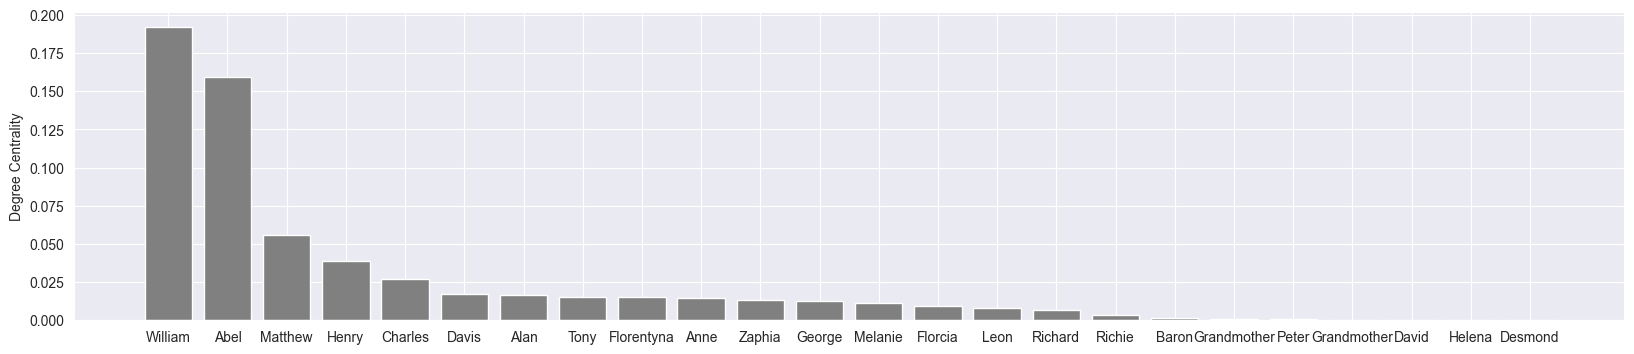

In [85]:
people = list(zip(*betw_list))[0]
people_first = [i.split("_")[0] for i in people]
score = list(zip(*betw_list))[1]
x_pos = np.arange(len(people))
plt.figure(figsize=(20, 4))
plt.bar(x_pos, score,align='center', color ='gray')
plt.xticks(x_pos, people_first)
plt.ylabel('Degree Centrality')
plt.show()

#### 3. Closeness Centrality

In [86]:
clos = nx.closeness_centrality(G)
clos_list = sorted(clos.items(), key=itemgetter(1), reverse=True)

In [87]:
clos_list

[('William_Kane', 0.9583333333333334),
 ('Abel_Rosnovski', 0.8518518518518519),
 ('Matthew_Lester', 0.7931034482758621),
 ('Henry_Osborne', 0.7666666666666667),
 ('Charles_Lester', 0.71875),
 ('Alan_Lloyd', 0.696969696969697),
 ('Davis_Leroy', 0.6764705882352942),
 ('George_Novak', 0.6764705882352942),
 ('Tony_Simmons', 0.6764705882352942),
 ('Florentyna_Rosnovski', 0.6571428571428571),
 ('Richard_Kane', 0.6571428571428571),
 ('Zaphia', 0.6388888888888888),
 ('Anne_Kane', 0.6216216216216216),
 ('Richie_Kane_Sr', 0.6052631578947368),
 ('David_Maxton', 0.6052631578947368),
 ('Peter_Parfitt', 0.6052631578947368),
 ('Grandmother_Kane', 0.5897435897435898),
 ('Florcia_Koskiewicz', 0.575),
 ('Grandmother_Cabot', 0.575),
 ('Melanie_Leroy', 0.575),
 ('Leon_Koskiewicz', 0.5609756097560976),
 ('Desmond_Pacey', 0.5476190476190477),
 ('Helena_Koskiewicz', 0.5348837209302325),
 ('Baron_Rosnovski', 0.48936170212765956)]

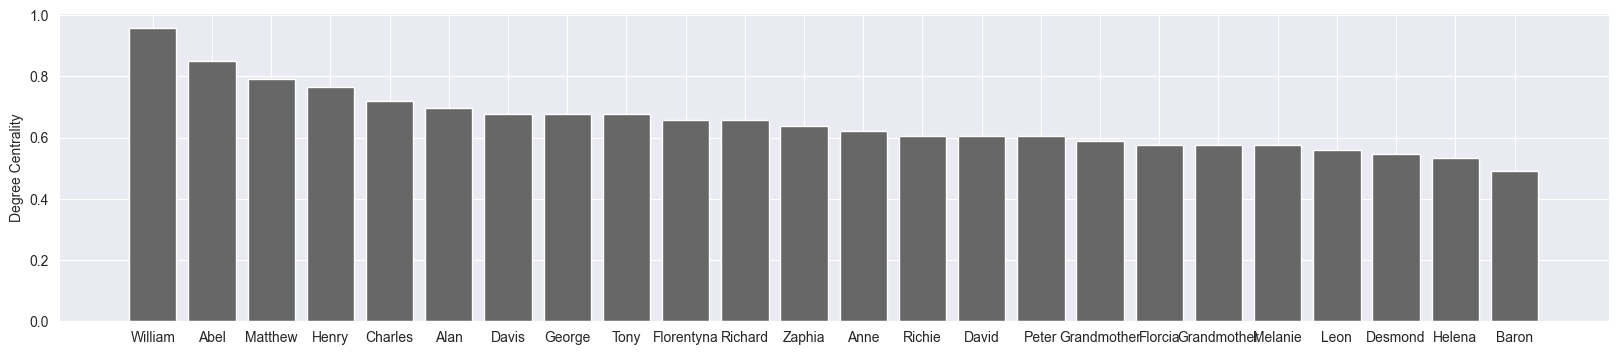

In [88]:
people = list(zip(*clos_list))[0]
people_first = [i.split("_")[0] for i in people]
score = list(zip(*clos_list))[1]
x_pos = np.arange(len(people))
plt.figure(figsize=(20, 4))
plt.bar(x_pos, score,align='center', color ='#676767')
plt.xticks(x_pos, people_first)
plt.ylabel('Degree Centrality')
plt.show()

#### 4. PageRank Centrality

In [89]:
pgr=nx.pagerank(G)
pgr_list = sorted(pgr.items(), key=itemgetter(1), reverse=True)

In [90]:
pgr_list

[('William_Kane', 0.18813763570604633),
 ('Abel_Rosnovski', 0.17927563566658464),
 ('Henry_Osborne', 0.07003044125181541),
 ('Matthew_Lester', 0.05365138698627329),
 ('George_Novak', 0.052183305272731906),
 ('Anne_Kane', 0.05170162776004819),
 ('Florentyna_Rosnovski', 0.04883601534028089),
 ('Alan_Lloyd', 0.04520930850817861),
 ('Richard_Kane', 0.033060218978478585),
 ('Tony_Simmons', 0.02947035785666243),
 ('Richie_Kane_Sr', 0.02787529665684401),
 ('Zaphia', 0.02772581475147122),
 ('Davis_Leroy', 0.025337964880325574),
 ('Charles_Lester', 0.023466836663970453),
 ('Leon_Koskiewicz', 0.020502877638195787),
 ('Melanie_Leroy', 0.018957629629567416),
 ('Peter_Parfitt', 0.01894955437334275),
 ('Florcia_Koskiewicz', 0.018815247288673422),
 ('Grandmother_Kane', 0.014313093632263948),
 ('David_Maxton', 0.0125010475535384),
 ('Desmond_Pacey', 0.01210259368227537),
 ('Grandmother_Cabot', 0.010104455542015119),
 ('Helena_Koskiewicz', 0.009593436912704922),
 ('Baron_Rosnovski', 0.00819821746771137

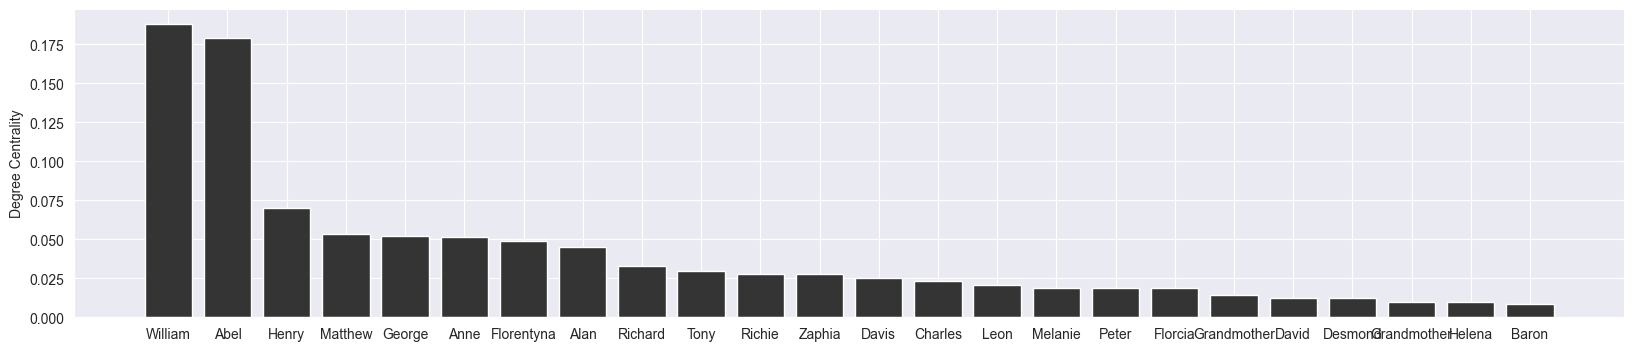

In [91]:
people = list(zip(*pgr_list))[0]
people_first = [i.split("_")[0] for i in people]
score = list(zip(*pgr_list))[1]
x_pos = np.arange(len(people))
plt.figure(figsize=(20, 4))
plt.bar(x_pos, score,align='center', color ='#343434')
plt.xticks(x_pos, people_first)
plt.ylabel('Degree Centrality')
plt.show()

#### Comparing the centrality measures

In [92]:
import pandas as pd
import seaborn as sns
centrality_measures = {
    'degree': degc,
    'betweenness': bet,
    'closeness': clos,
    'page rank': pgr,
}
centrality = pd.DataFrame(centrality_measures)
centrality

degree  betweenness  closeness  page rank
William_Kane          0.956522     0.192048   0.958333   0.188138
Anne_Kane             0.434783     0.014355   0.621622   0.051702
Henry_Osborne         0.695652     0.038920   0.766667   0.070030
Matthew_Lester        0.739130     0.055728   0.793103   0.053651
Abel_Rosnovski        0.826087     0.159056   0.851852   0.179276
Florcia_Koskiewicz    0.260870     0.009519   0.575000   0.018815
Davis_Leroy           0.521739     0.016974   0.676471   0.025338
George_Novak          0.521739     0.012565   0.676471   0.052183
Zaphia                0.434783     0.013406   0.638889   0.027726
Florentyna_Rosnovski  0.478261     0.015046   0.657143   0.048836
Richard_Kane          0.478261     0.006856   0.657143   0.033060
Baron_Rosnovski       0.130435     0.001318   0.489362   0.008198
Helena_Koskiewicz     0.130435     0.000000   0.534884   0.009593
Alan_Lloyd            0.565217     0.016813   0.696970   0.045209
Desmond_Pacey         0.173913     0.000000   0.547619   0.012103
Richie_Kane_Sr        0.391304     0.003600   0.605263   0.027875
Grandmother_Kane      0.347826     0.001004   0.589744   0.014313
Grandmother_Cabot     0.304348     0.000439   0.575000   0.010104
Tony_Simmons          0.521739     0.015100   0.676471   0.029470
Melanie_Leroy         0.260870     0.011199   0.575000   0.018958
Leon_Koskiewicz       0.217391     0.008344   0.560976   0.020503
David_Maxton          0.347826     0.000439   0.605263   0.012501
Charles_Lester        0.608696     0.026990   0.718750   0.023467
Peter_Parfitt         0.347826     0.000834   0.605263   0.018950

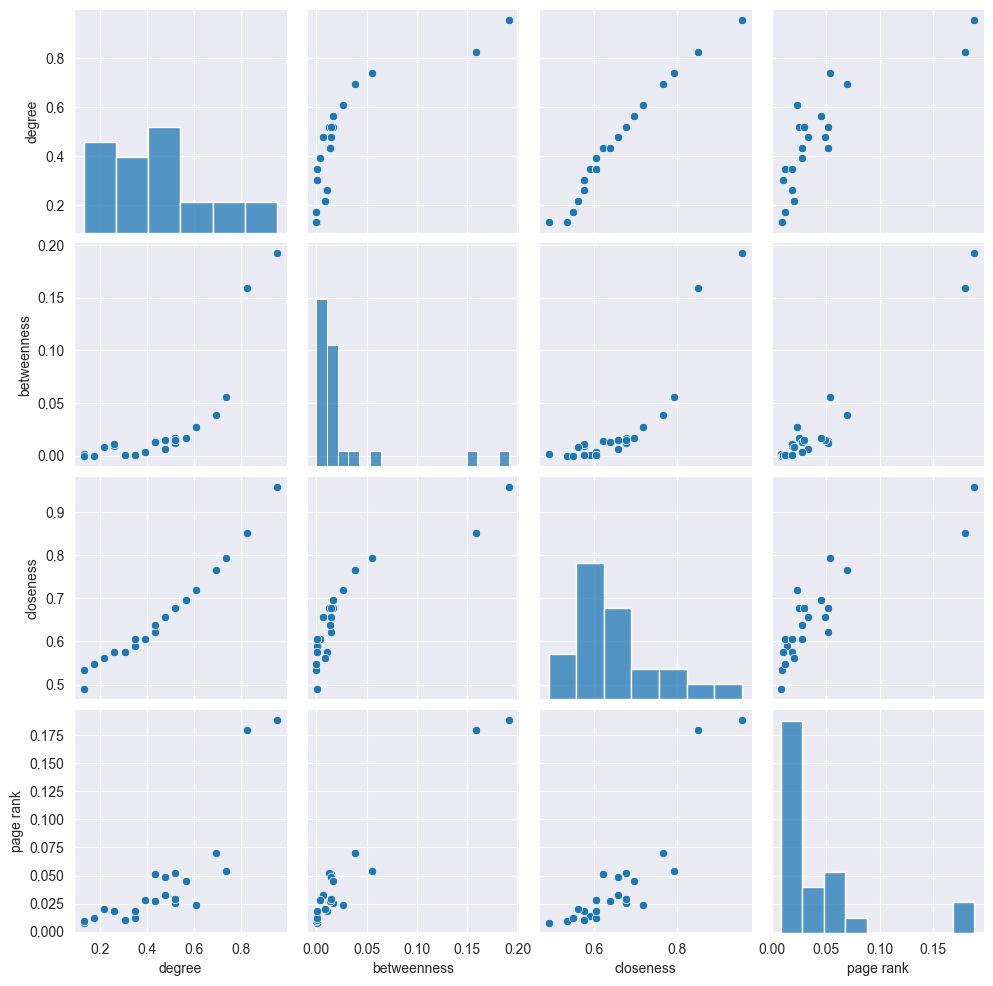

In [93]:
sns.pairplot(centrality)

In [94]:
c_betweenness = list(bet.values())
c_closeness = list(clos.values())
c_degree = list(degc.values())
c_pagerank = list(pgr.values())

Text(0.5, 1.0, 'Betweenness Centrality')

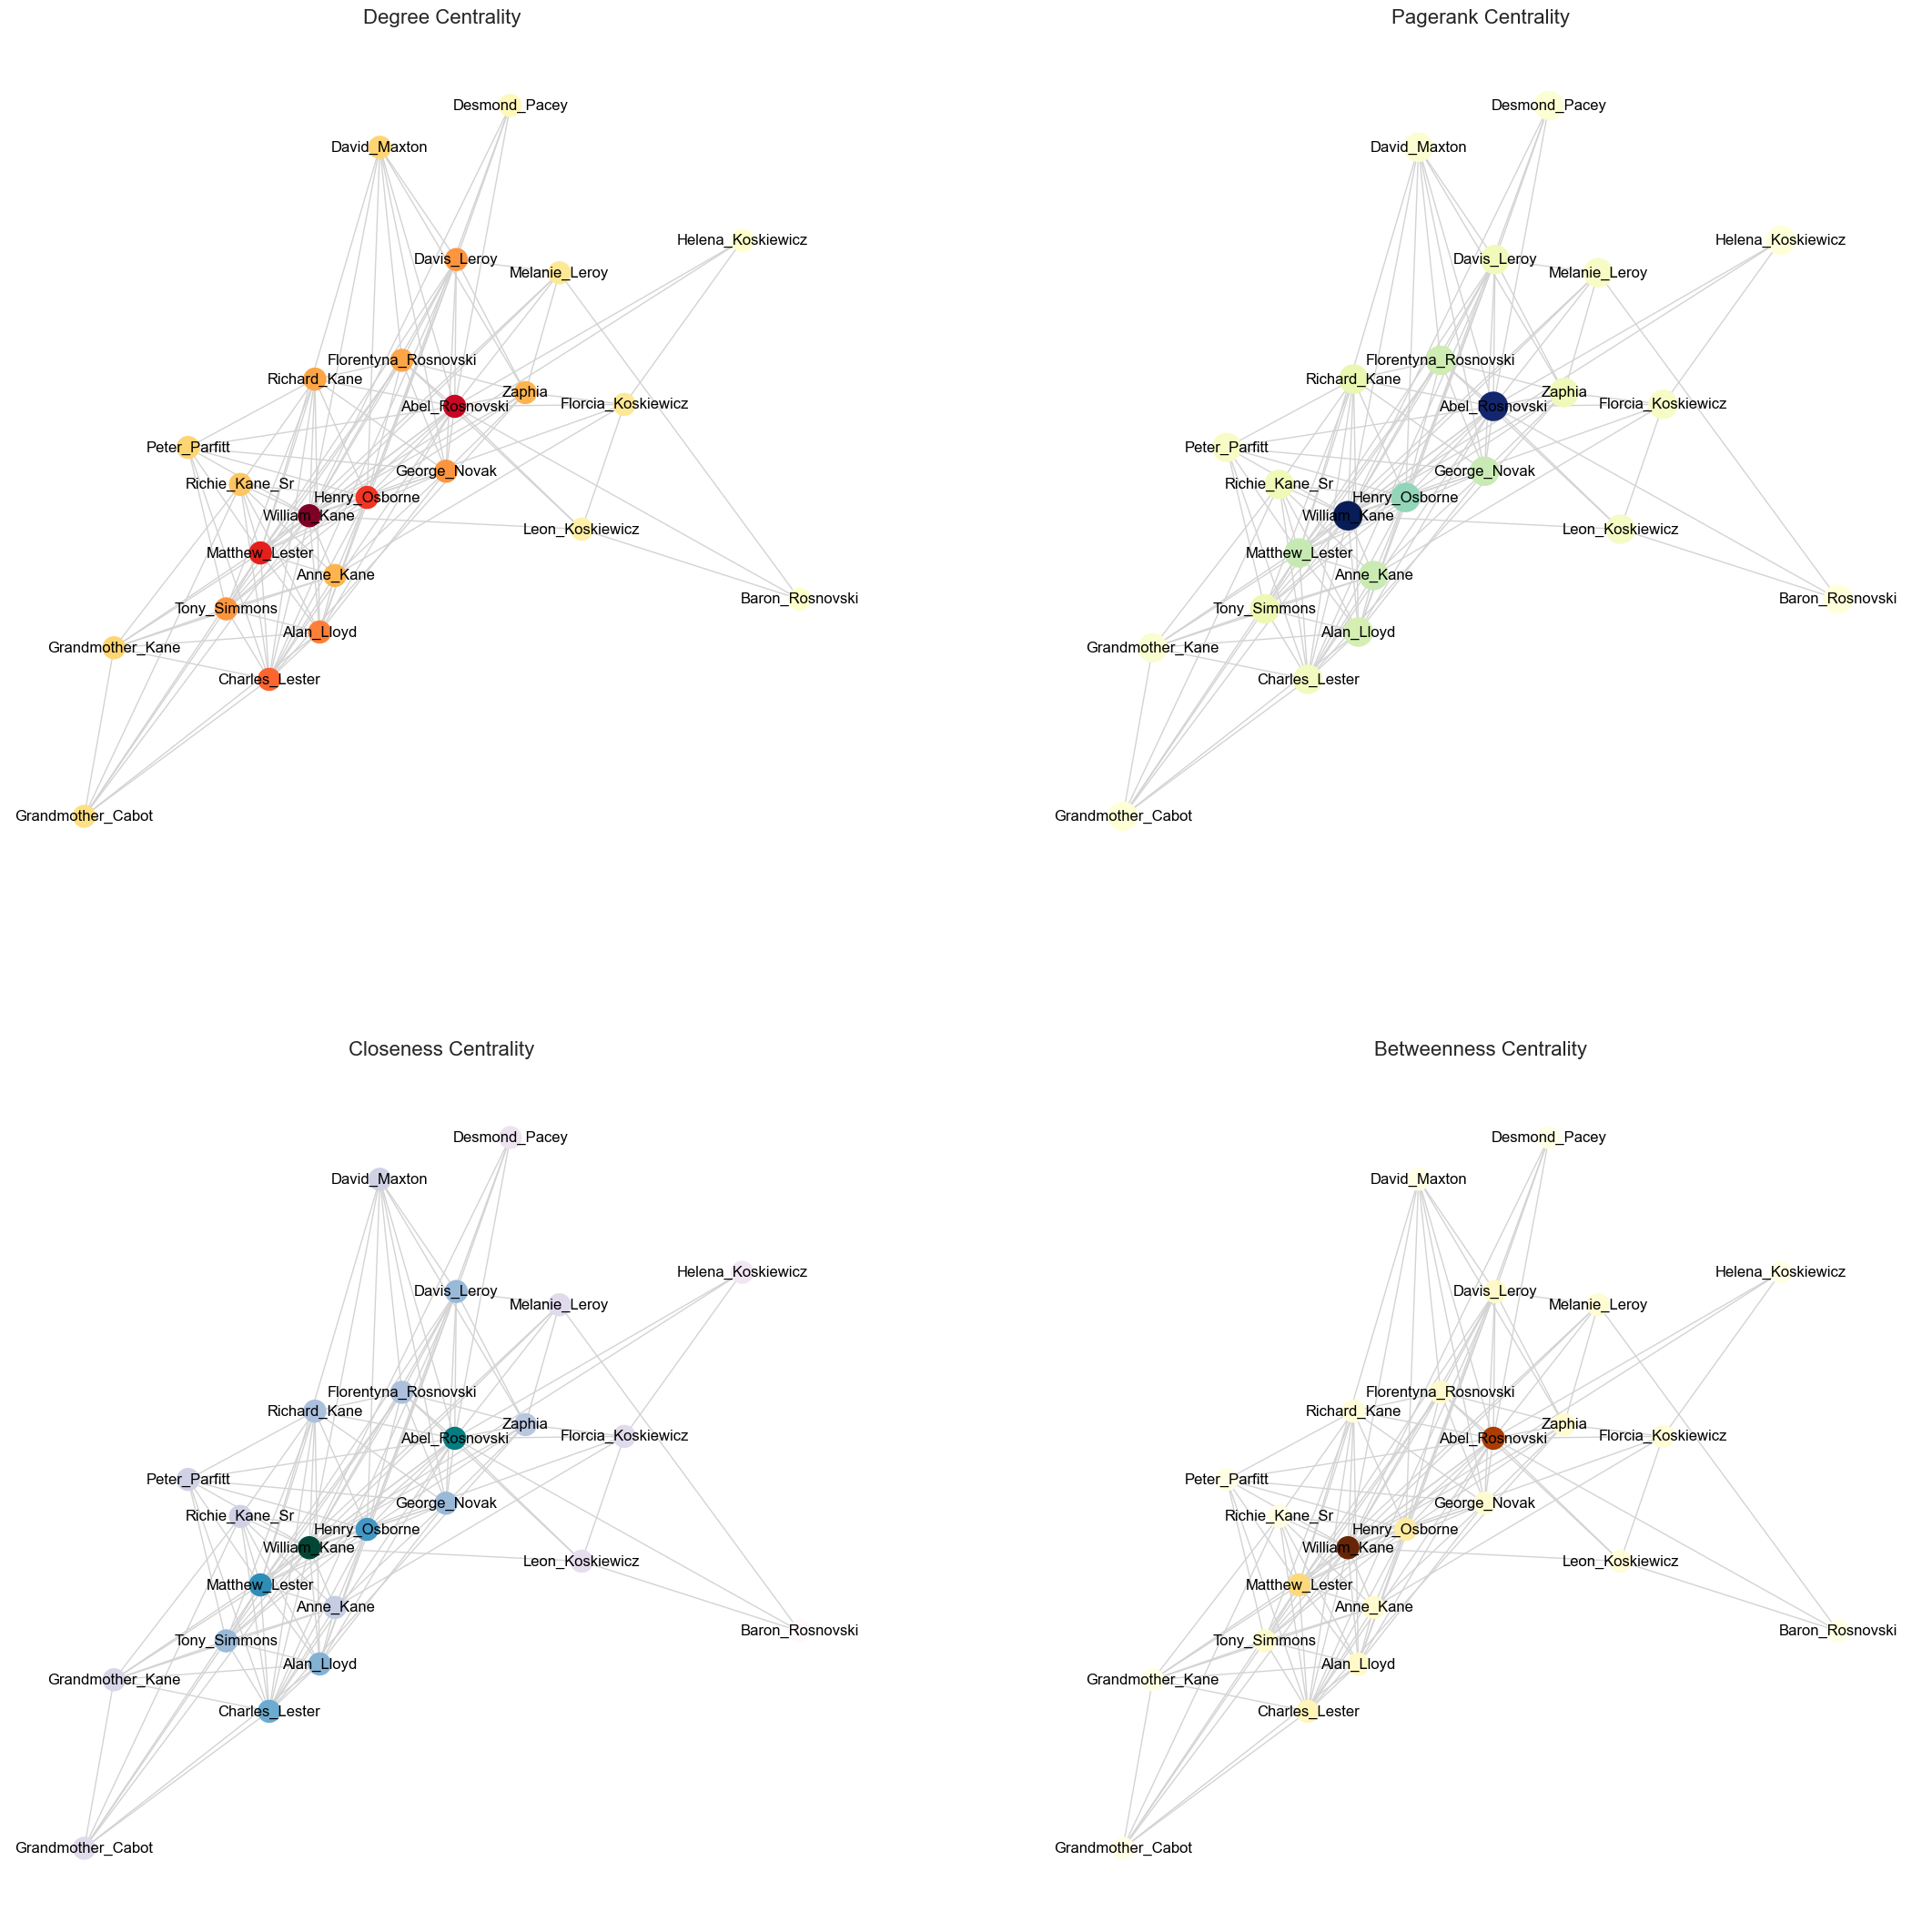

In [95]:
plt.figure(figsize=(27, 27))
# Degree Centrality
f, axarr = plt.subplots(2, 2, num=1)
plt.sca(axarr[0,0])
nx.draw(G, cmap = plt.get_cmap('YlOrRd'), node_color = c_degree, node_size=300, edge_color='#D3D3D3', pos=pos, with_labels=True)
axarr[0,0].set_title('Degree Centrality', size=16)
# PageRank Centrality
plt.sca(axarr[0,1])
nx.draw(G, cmap = plt.get_cmap('YlGnBu'), node_color = c_pagerank, node_size=500, pos=pos, with_labels=True, edge_color='#D3D3D3', font_size=12)
axarr[0,1].set_title('Pagerank Centrality', size=16)
# Closeness Centrality
plt.sca(axarr[1,0])
nx.draw(G, cmap = plt.get_cmap('PuBuGn'), node_color = c_closeness, node_size=300, pos=pos, edge_color='#D3D3D3',with_labels=True)
axarr[1,0].set_title('Closeness Centrality', size=16)
# Betweenness Centrality
plt.sca(axarr[1,1])
nx.draw(G, cmap = plt.get_cmap('YlOrBr'), node_color = c_betweenness, node_size=300, pos=pos, edge_color='#D3D3D3', with_labels=True)
axarr[1,1].set_title('Betweenness Centrality', size=16)

#### Other centrality measures

##### Eigenvector Centrality

In [96]:
eig = nx.eigenvector_centrality(G)
eig_list = sorted(eig.items(), key=itemgetter(1), reverse=True)
eig_list

[('William_Kane', 0.3384330560653714),
 ('Matthew_Lester', 0.30009850953449013),
 ('Abel_Rosnovski', 0.29156665444461066),
 ('Henry_Osborne', 0.29018622314139414),
 ('Charles_Lester', 0.2590924906859354),
 ('Alan_Lloyd', 0.2495559153050768),
 ('George_Novak', 0.23278161167292452),
 ('Tony_Simmons', 0.2310711802475376),
 ('Richard_Kane', 0.22536354386348778),
 ('Davis_Leroy', 0.22311779762206538),
 ('Florentyna_Rosnovski', 0.2096145985269529),
 ('Anne_Kane', 0.19009304682172026),
 ('Zaphia', 0.1815415316615918),
 ('Peter_Parfitt', 0.1773724316339935),
 ('Richie_Kane_Sr', 0.17557110748041474),
 ('David_Maxton', 0.1690911820333472),
 ('Grandmother_Kane', 0.15406236991512687),
 ('Grandmother_Cabot', 0.13968997649293832),
 ('Melanie_Leroy', 0.11240671998185814),
 ('Desmond_Pacey', 0.093512704322173),
 ('Florcia_Koskiewicz', 0.09326939978714863),
 ('Leon_Koskiewicz', 0.07953685740487863),
 ('Helena_Koskiewicz', 0.059157416159789304),
 ('Baron_Rosnovski', 0.03954724039907003)]

##### Harmonic Closeness Centrality

In [97]:
#harmonic closeness centrality
har = nx.harmonic_centrality(G)
sorted(har.items(), key=itemgetter(1), reverse=True)

[('William_Kane', 22.5),
 ('Abel_Rosnovski', 21.0),
 ('Matthew_Lester', 20.0),
 ('Henry_Osborne', 19.5),
 ('Charles_Lester', 18.5),
 ('Alan_Lloyd', 18.0),
 ('George_Novak', 17.5),
 ('Tony_Simmons', 17.5),
 ('Davis_Leroy', 17.5),
 ('Richard_Kane', 17.0),
 ('Florentyna_Rosnovski', 17.0),
 ('Zaphia', 16.5),
 ('Anne_Kane', 16.333333333333332),
 ('Richie_Kane_Sr', 15.833333333333334),
 ('David_Maxton', 15.5),
 ('Peter_Parfitt', 15.5),
 ('Grandmother_Kane', 15.333333333333332),
 ('Grandmother_Cabot', 14.833333333333332),
 ('Melanie_Leroy', 14.5),
 ('Florcia_Koskiewicz', 14.5),
 ('Leon_Koskiewicz', 14.0),
 ('Desmond_Pacey', 13.5),
 ('Helena_Koskiewicz', 13.0),
 ('Baron_Rosnovski', 12.333333333333332)]

#### Centrality Scatter Plot

In [98]:
#Centrality scatter plot
def centrality_scatter(dict1,dict2,path="",ylab="",xlab="",title="",line=False):
    # Create figure and drawing axis
    fig = plt.figure(figsize=(5,5))
    ax1 = fig.add_subplot(111)
    # Create items and extract centralities
    items1 = sorted(dict1.items())
    items2 = sorted(dict2.items())
    xdata=[b for a,b in items1]
    ydata=[b for a,b in items2]
    # Add each actor to the plot by ID
    for p in range(len(items1)):
        ax1.text(x=xdata[p], y=ydata[p],s=str(items1[p][0]), color="b")
        if line:
            # use NumPy to calculate the best fit
            slope, yint = plt.polyfit(xdata,ydata,1)
            xline = plt.xticks()[0]
            yline = map(lambda x: slope*x+yint,xline)
            ax1.plot(xline,yline,ls='--',color='b')
        # Set new x- and y-axis limits
    plt.xlim((0.0,max(xdata)+(.15*max(xdata))))
    plt.ylim((0.0,max(ydata)+(.15*max(ydata))))
    # Add labels and save
    ax1.set_title(title)
    ax1.set_xlabel(xlab)
    ax1.set_ylabel(ylab)
    plt.savefig(path)

In [99]:
cc=nx.closeness_centrality(G)
dc=nx.degree_centrality(G)
bc = nx.betweenness_centrality(G)
ec = nx.eigenvector_centrality(G,max_iter=1000)

sorted_dc=sorted(dc.items())
sorted_bc=sorted(bc.items())
sorted_cc=sorted(cc.items())
sorted_ec=sorted(ec.items())

#extract the centralities
deg_data=[y for x,y in sorted_dc]
close_data=[y for x,y in sorted_cc]
betw_data=[y for x,y in sorted_bc]
eig_data=[y for x,y in sorted_ec]

In [100]:
from scipy.stats import pearsonr

r1=pearsonr(deg_data,betw_data)
s= "\n Pearson Correlation Coeff deg and betweenness: " + repr(r1)
print (s)

r2=pearsonr(deg_data,close_data)
s= "\n Pearson Correlation Coeff deg and closeness: " + repr(r2)
print (s)


r3=pearsonr(betw_data,close_data)
s= "\n Pearson Correlation Coeff betweennness and closeness: " + repr(r3)
print (s)

r4=pearsonr(betw_data,eig_data)
s= "\n Pearson Correlation Coeff betweennness and eigenvector : " + repr(r4)
print (s)


 Pearson Correlation Coeff deg and betweenness: PearsonRResult(statistic=0.7915929473693128, pvalue=4.0806790700453945e-06)

 Pearson Correlation Coeff deg and closeness: PearsonRResult(statistic=0.9829490068633333, pvalue=1.127993463845808e-17)

 Pearson Correlation Coeff betweennness and closeness: PearsonRResult(statistic=0.868312174781368, pvalue=3.822370591241955e-08)

 Pearson Correlation Coeff betweennness and eigenvector : PearsonRResult(statistic=0.6452099817285015, pvalue=0.0006631064385409649)


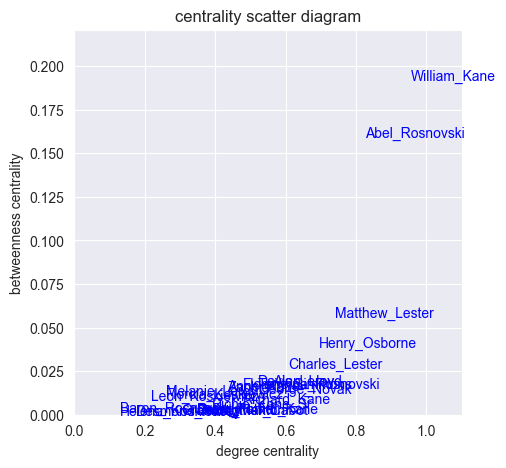

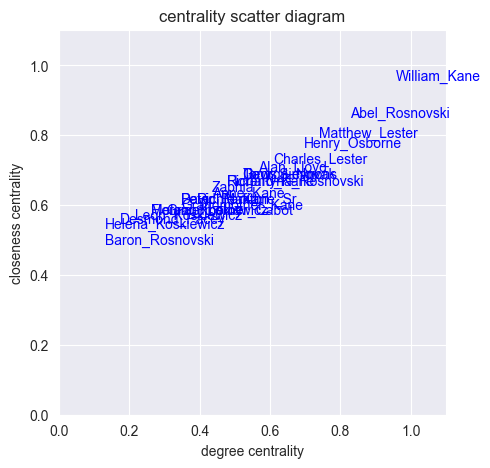

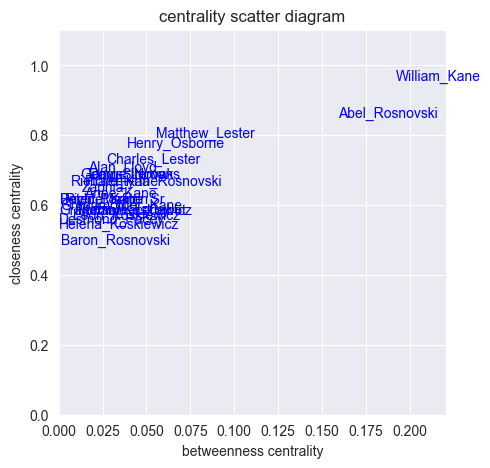

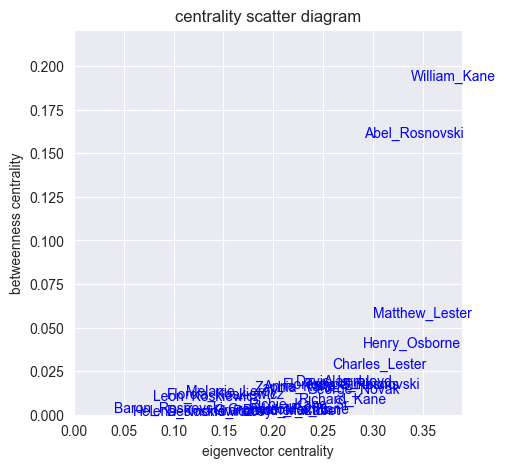

In [101]:
##########################
# Draw centrality scatter
centrality_scatter(dc,bc,path="cum18bcdc",ylab="betweenness centrality",xlab="degree centrality",title="centrality scatter diagram",line=False)
centrality_scatter(dc,cc,path="cum18ccdc",ylab="closeness centrality",xlab="degree centrality",title="centrality scatter diagram",line=False)
centrality_scatter(bc,cc,path="cum18ccbc",ylab="closeness centrality",xlab="betweenness centrality",title="centrality scatter diagram",line=False)
centrality_scatter(ec,bc,path="cum18bcec",ylab="betweenness centrality",xlab="eigenvector centrality",title="centrality scatter diagram",line=False)

### d. Clustering Coefficients

Local Clustering Coefficients

In [102]:
print(nx.transitivity(G))

0.6262341325811002


In [103]:
d = nx.clustering(G)
dsorted = {k: v for k, v in sorted(d.items(), key = lambda item: item[1], reverse=True)}

In [104]:
dsorted

{'Helena_Koskiewicz': 1.0,
 'Desmond_Pacey': 1.0,
 'David_Maxton': 0.9642857142857143,
 'Grandmother_Cabot': 0.9523809523809523,
 'Grandmother_Kane': 0.9285714285714286,
 'Peter_Parfitt': 0.9285714285714286,
 'Richie_Kane_Sr': 0.8333333333333334,
 'Richard_Kane': 0.8,
 'Alan_Lloyd': 0.717948717948718,
 'George_Novak': 0.7121212121212122,
 'Tony_Simmons': 0.7121212121212122,
 'Florentyna_Rosnovski': 0.7090909090909091,
 'Anne_Kane': 0.6888888888888889,
 'Davis_Leroy': 0.6818181818181818,
 'Zaphia': 0.6666666666666666,
 'Baron_Rosnovski': 0.6666666666666666,
 'Melanie_Leroy': 0.6666666666666666,
 'Charles_Lester': 0.6483516483516484,
 'Henry_Osborne': 0.6166666666666667,
 'Leon_Koskiewicz': 0.6,
 'Matthew_Lester': 0.5808823529411765,
 'Florcia_Koskiewicz': 0.5333333333333333,
 'Abel_Rosnovski': 0.43859649122807015,
 'William_Kane': 0.42424242424242425}

Global Clustering Coefficients

In [105]:
print(nx.average_clustering(G))

0.727966870662304


### e. Community Detection

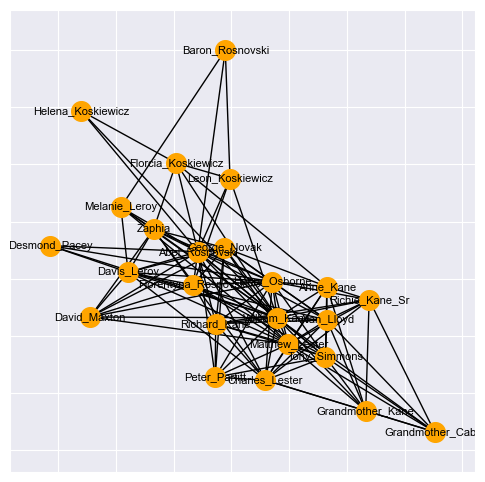

In [106]:
plt.figure(3, figsize=(6,6))
nx.draw_networkx(G,with_labels=True, node_size=200, font_size = 8, node_color="orange")

#### Clique Perlocation Method

In [107]:
list(nx.find_cliques(G))

[['Baron_Rosnovski', 'Abel_Rosnovski', 'Melanie_Leroy'],
 ['Baron_Rosnovski', 'Abel_Rosnovski', 'Leon_Koskiewicz'],
 ['William_Kane',
  'Anne_Kane',
  'Matthew_Lester',
  'Alan_Lloyd',
  'Grandmother_Kane',
  'Charles_Lester',
  'Tony_Simmons'],
 ['William_Kane',
  'Anne_Kane',
  'Matthew_Lester',
  'Alan_Lloyd',
  'Grandmother_Kane',
  'Charles_Lester',
  'Richie_Kane_Sr'],
 ['William_Kane',
  'Anne_Kane',
  'Matthew_Lester',
  'Alan_Lloyd',
  'Henry_Osborne',
  'George_Novak'],
 ['William_Kane',
  'Anne_Kane',
  'Matthew_Lester',
  'Alan_Lloyd',
  'Henry_Osborne',
  'Charles_Lester',
  'Tony_Simmons'],
 ['William_Kane',
  'Anne_Kane',
  'Matthew_Lester',
  'Alan_Lloyd',
  'Henry_Osborne',
  'Charles_Lester',
  'Richie_Kane_Sr'],
 ['William_Kane', 'Anne_Kane', 'Florcia_Koskiewicz'],
 ['William_Kane',
  'Abel_Rosnovski',
  'Melanie_Leroy',
  'Davis_Leroy',
  'Matthew_Lester'],
 ['William_Kane', 'Abel_Rosnovski', 'Melanie_Leroy', 'Davis_Leroy', 'Zaphia'],
 ['William_Kane', 'Abel_Rosnovs

In [108]:
synthetic = nx.make_max_clique_graph(G)
print(synthetic.edges())

[(0, 1), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (0, 19), (0, 20), (0, 21), (0, 22), (0, 23), (0, 24), (0, 25), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (1, 20), (1, 21), (1, 22), (1, 23), (1, 24), (1, 25), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (2, 13), (2, 14), (2, 15), (2, 16), (2, 17), (2, 18), (2, 19), (2, 20), (2, 21), (2, 22), (2, 23), (2, 24), (2, 25), (2, 26), (2, 27), (2, 28), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (3, 15), (3, 16), (3, 17), (3, 18), (3, 19), (3, 20), (3, 21), (3, 22), (3, 23), (3, 24), (3, 25), (3, 26), (3, 27), (3, 28), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (4, 15), (4, 16), (4, 17), (4, 18), (4, 19), (4, 20), (4, 21), (4, 22), (4, 23), (4, 24), (4, 25), (4, 26), (4, 27), (4, 28), (5, 6), (5, 7)

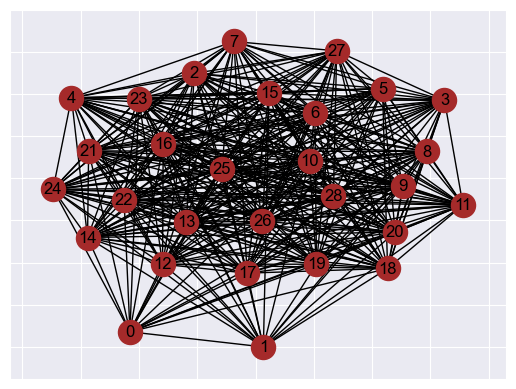

In [109]:
nx.draw_networkx(synthetic,node_color='brown')

In [110]:
from networkx.algorithms.community import k_clique_communities  # find k-clique community using percolation method
c = list(k_clique_communities(G, 3))
print(c)

[frozenset({'Melanie_Leroy', 'Matthew_Lester', 'George_Novak', 'Leon_Koskiewicz', 'Anne_Kane', 'Alan_Lloyd', 'Desmond_Pacey', 'Davis_Leroy', 'Helena_Koskiewicz', 'Grandmother_Kane', 'David_Maxton', 'William_Kane', 'Florcia_Koskiewicz', 'Henry_Osborne', 'Charles_Lester', 'Richard_Kane', 'Florentyna_Rosnovski', 'Abel_Rosnovski', 'Grandmother_Cabot', 'Baron_Rosnovski', 'Tony_Simmons', 'Zaphia', 'Peter_Parfitt', 'Richie_Kane_Sr'})]


In [111]:
print(len(list(c)))

1


#### Girvan Newman Method

In [112]:
from networkx.algorithms.community.centrality import girvan_newman
import community
communities_generator = girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
sorted(map(sorted, next_level_communities))

[['Abel_Rosnovski',
  'Alan_Lloyd',
  'Anne_Kane',
  'Charles_Lester',
  'David_Maxton',
  'Davis_Leroy',
  'Desmond_Pacey',
  'Florcia_Koskiewicz',
  'Florentyna_Rosnovski',
  'George_Novak',
  'Grandmother_Cabot',
  'Grandmother_Kane',
  'Henry_Osborne',
  'Leon_Koskiewicz',
  'Matthew_Lester',
  'Melanie_Leroy',
  'Peter_Parfitt',
  'Richard_Kane',
  'Richie_Kane_Sr',
  'Tony_Simmons',
  'William_Kane',
  'Zaphia'],
 ['Baron_Rosnovski'],
 ['Helena_Koskiewicz']]

#### Louvain method

In [113]:
import pprint
import community.community_louvain as community_louvain
part = community_louvain.best_partition(G, resolution=1.6)
print(part)
communities = {}
for p in part.keys():
    key = part[p]
    if key in communities:
        communities[key].append(p)
    else:
        communities[key] = [p]

from itertools import zip_longest

# zip all the values together
zl = list(zip_longest(*communities.values()))

# create dataframe
comm_df = pd.DataFrame(zl, columns=communities.keys())
pprint.pprint(communities)
comm_df

{'William_Kane': 0, 'Anne_Kane': 2, 'Henry_Osborne': 2, 'Matthew_Lester': 0, 'Abel_Rosnovski': 3, 'Florcia_Koskiewicz': 3, 'Davis_Leroy': 3, 'George_Novak': 3, 'Zaphia': 3, 'Florentyna_Rosnovski': 1, 'Richard_Kane': 1, 'Baron_Rosnovski': 3, 'Helena_Koskiewicz': 3, 'Alan_Lloyd': 0, 'Desmond_Pacey': 3, 'Richie_Kane_Sr': 2, 'Grandmother_Kane': 0, 'Grandmother_Cabot': 0, 'Tony_Simmons': 0, 'Melanie_Leroy': 3, 'Leon_Koskiewicz': 3, 'David_Maxton': 3, 'Charles_Lester': 0, 'Peter_Parfitt': 0}
{0: ['William_Kane',
     'Matthew_Lester',
     'Alan_Lloyd',
     'Grandmother_Kane',
     'Grandmother_Cabot',
     'Tony_Simmons',
     'Charles_Lester',
     'Peter_Parfitt'],
 1: ['Florentyna_Rosnovski', 'Richard_Kane'],
 2: ['Anne_Kane', 'Henry_Osborne', 'Richie_Kane_Sr'],
 3: ['Abel_Rosnovski',
     'Florcia_Koskiewicz',
     'Davis_Leroy',
     'George_Novak',
     'Zaphia',
     'Baron_Rosnovski',
     'Helena_Koskiewicz',
     'Desmond_Pacey',
     'Melanie_Leroy',
     'Leon_Koskiewicz',
    

0               2                   3  \
0        William_Kane       Anne_Kane      Abel_Rosnovski   
1      Matthew_Lester   Henry_Osborne  Florcia_Koskiewicz   
2          Alan_Lloyd  Richie_Kane_Sr         Davis_Leroy   
3    Grandmother_Kane            None        George_Novak   
4   Grandmother_Cabot            None              Zaphia   
5        Tony_Simmons            None     Baron_Rosnovski   
6      Charles_Lester            None   Helena_Koskiewicz   
7       Peter_Parfitt            None       Desmond_Pacey   
8                None            None       Melanie_Leroy   
9                None            None     Leon_Koskiewicz   
10               None            None        David_Maxton   

                       1  
0   Florentyna_Rosnovski  
1           Richard_Kane  
2                   None  
3                   None  
4                   None  
5                   None  
6                   None  
7                   None  
8                   None  
9                   None  
10                  None

In [114]:
print(community_louvain.modularity(part, G))

0.2878132890749937


In [115]:
induced = community_louvain.induced_graph(part, G)
print(induced.nodes())
print(induced.edges())

[0, 2, 3, 1]
[(0, 2), (0, 0), (0, 3), (0, 1), (2, 2), (2, 3), (2, 1), (3, 3), (3, 1), (1, 1)]


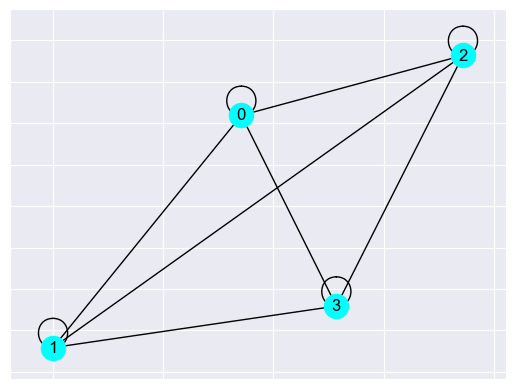

In [116]:
nx.draw_networkx(induced,node_color='cyan')

In [117]:
part.values()

dict_values([0, 2, 2, 0, 3, 3, 3, 3, 3, 1, 1, 3, 3, 0, 3, 2, 0, 0, 0, 3, 3, 3, 0, 0])

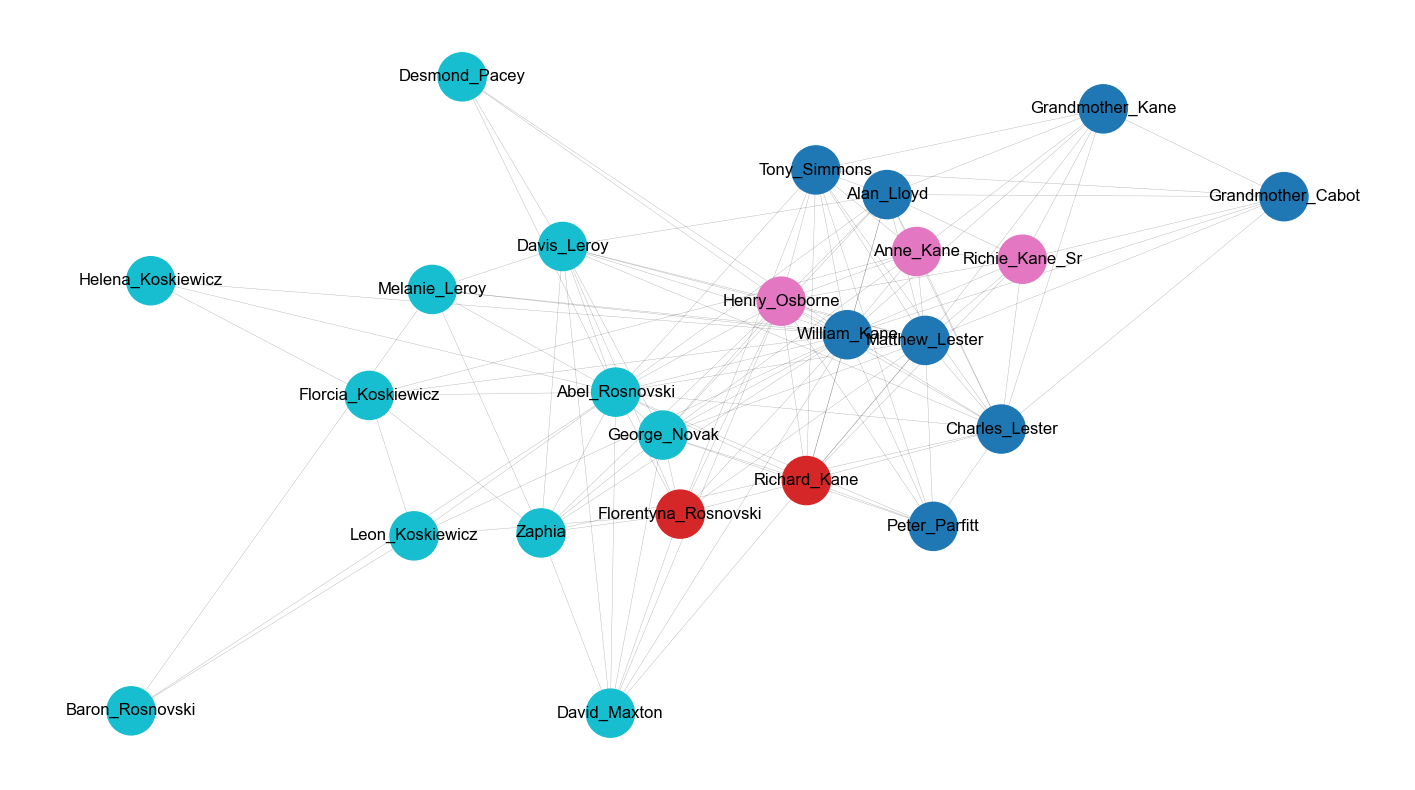

In [126]:
pos = nx.spring_layout(G)
plt.figure(figsize=(18, 10))
plt.axis('off')
# Use matplotlib colormap : https://matplotlib.org/gallery/color/colormap_reference.html
nx.draw_networkx_nodes(G, pos, part.keys(), node_size=1200, cmap=plt.cm.tab10, node_color=list(part.values()))
nx.draw_networkx_edges(G, pos, alpha=0.3, width=0.3)
nx.draw_networkx_labels(G, pos=pos)
plt.show(G)

### f. Degree distribution, Average Shortest path and size of largest component, generative models

#### Degree Histogram and Degree Distribution

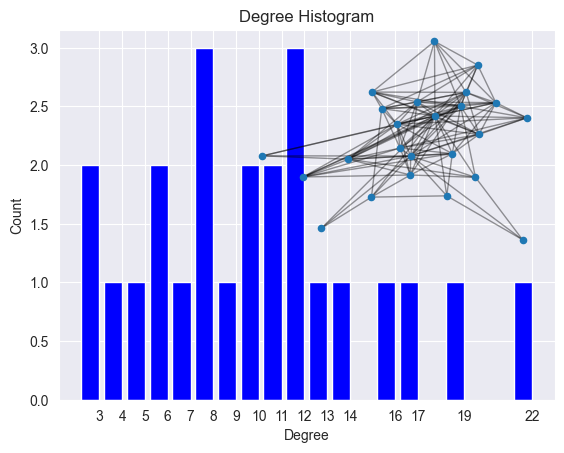

In [127]:
import collections

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
A = (G.subgraph(c) for c in nx.connected_components(G))
Gcc = sorted(A, key=len, reverse=True)[0]
pos = nx.spring_layout(G)
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.4)

plt.show()

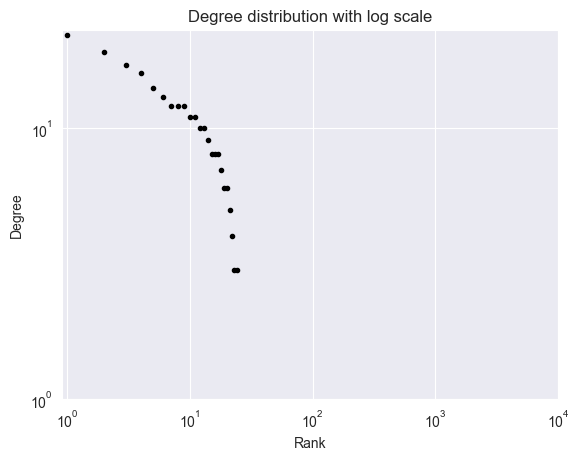

In [128]:
degrees = G.degree()
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence

# loglog tells matplotlib to use log scales.
# The x values, range(1,10001), are the ranks,
# and the degree_sequence are the y values.
# The String 'k.' means use black (k) dots (.)
'''
Now we need to do some plotting. Plotting using matplotlib is a lot like
plotting using MATLAB. Because the degree distribution of a BA graph is a
power-law, we'd like to use a plot with log scales. Here is how we'd do it.

'''
plt.loglog(range(1,G.order()+1),degree_sequence,'k.')
plt.title("Degree distribution with log scale")
plt.xlabel('Rank')
plt.ylabel('Degree')
plt.ylim(1,max(degree_sequence)+1)
plt.xlim(.9,10001)
plt.savefig("degree_distribution.png")

#### Largest Connected Components

In [129]:
# Connected Components
list(nx.connected_components(G))

[{'Abel_Rosnovski',
  'Alan_Lloyd',
  'Anne_Kane',
  'Baron_Rosnovski',
  'Charles_Lester',
  'David_Maxton',
  'Davis_Leroy',
  'Desmond_Pacey',
  'Florcia_Koskiewicz',
  'Florentyna_Rosnovski',
  'George_Novak',
  'Grandmother_Cabot',
  'Grandmother_Kane',
  'Helena_Koskiewicz',
  'Henry_Osborne',
  'Leon_Koskiewicz',
  'Matthew_Lester',
  'Melanie_Leroy',
  'Peter_Parfitt',
  'Richard_Kane',
  'Richie_Kane_Sr',
  'Tony_Simmons',
  'William_Kane',
  'Zaphia'}]

In [130]:
#largest connected component
largest = max(nx.connected_components(G), key=len)
len(largest)

24

**From the above we see that all the characters are connected to each other**

This shouldn't come as a surprise to us because although there are two protagonists who lead very different lives in the book, they influence each other's lives very significantly

#### Average Shortest Paths

In [131]:
print(nx.average_shortest_path_length(G))

1.568840579710145


We notice that the average shortest path length is under 2, this indicates that the characters are not only connected to each other as displayed by the largest connected components, but they are also closely connected with most of them directly interacting with one another

#### Generative Models

##### Preferential Attachments

In [132]:
preds = nx.preferential_attachment(G)
for u, v, p in preds:
    print('(%s, %s) -> %.2f' % (u, v, p))

(George_Novak, Melanie_Leroy) -> 72.00
(George_Novak, Florcia_Koskiewicz) -> 72.00
(George_Novak, Baron_Rosnovski) -> 36.00
(George_Novak, Leon_Koskiewicz) -> 60.00
(George_Novak, Desmond_Pacey) -> 48.00
(George_Novak, Helena_Koskiewicz) -> 36.00
(George_Novak, Charles_Lester) -> 168.00
(George_Novak, Grandmother_Cabot) -> 84.00
(George_Novak, Grandmother_Kane) -> 96.00
(George_Novak, Tony_Simmons) -> 144.00
(George_Novak, Richie_Kane_Sr) -> 108.00
(Leon_Koskiewicz, Melanie_Leroy) -> 30.00
(Leon_Koskiewicz, Matthew_Lester) -> 85.00
(Leon_Koskiewicz, Henry_Osborne) -> 80.00
(Leon_Koskiewicz, Alan_Lloyd) -> 65.00
(Leon_Koskiewicz, Desmond_Pacey) -> 20.00
(Leon_Koskiewicz, Helena_Koskiewicz) -> 15.00
(Leon_Koskiewicz, Charles_Lester) -> 70.00
(Leon_Koskiewicz, Anne_Kane) -> 50.00
(Leon_Koskiewicz, Davis_Leroy) -> 60.00
(Leon_Koskiewicz, Richard_Kane) -> 55.00
(Leon_Koskiewicz, David_Maxton) -> 40.00
(Leon_Koskiewicz, Grandmother_Cabot) -> 35.00
(Leon_Koskiewicz, Grandmother_Kane) -> 40.00

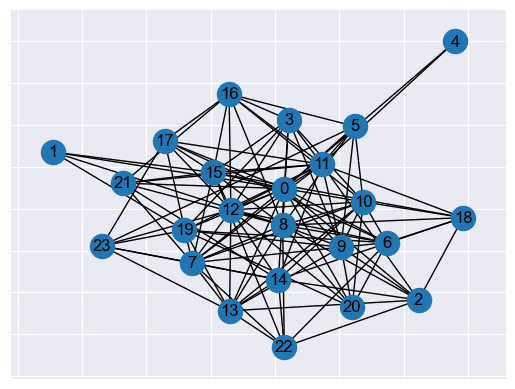

In [133]:
Gpa = nx.barabasi_albert_graph(len(G.nodes()), 7)
nx.draw_networkx(Gpa)

##### G(n,p) and G(n,m) graphs

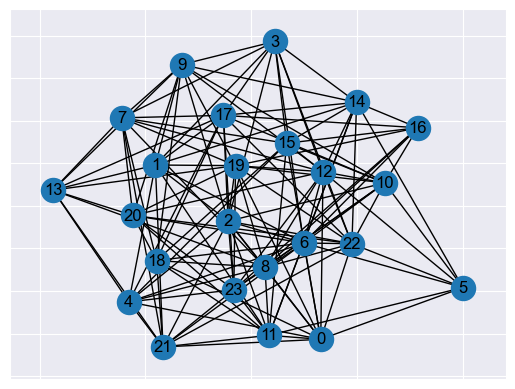

In [134]:
Gnp = nx.erdos_renyi_graph(len(G.nodes()), p=0.5)
nx.draw_networkx(Gnp)

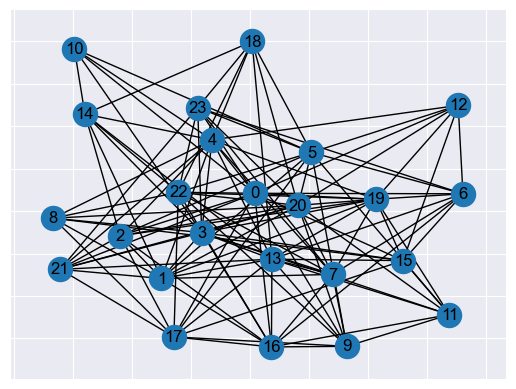

In [135]:
Gnm = nx.gnm_random_graph(len(G.nodes()), len(G.edges))
nx.draw_networkx(Gnm)

##### Small World Graph

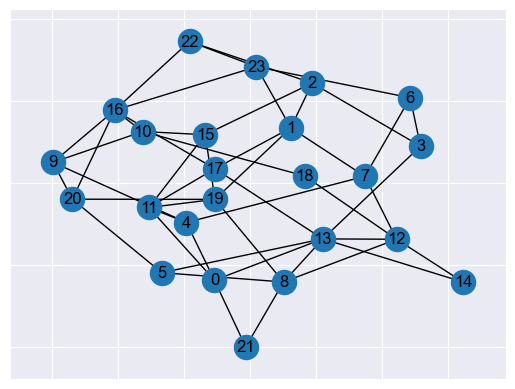

In [136]:
Gsw = nx.connected_watts_strogatz_graph(len(G.nodes()), len(G.edges)//len(G.nodes()), 0.8)
nx.draw_networkx(Gsw)

## 2. Analysis

### a. Who are the protagonists as per your analysis? If the 4 centralities are not having high correlation, how do you interpret them?

After analysing all the centrality measures and communities, we can conclusively state that William Lowell Kane and Abel Rosnovski are the two protagonists of the book. This is true as can be inferred from the title of the book (Kane and Abel)

In our case the three centrality measures are strongly correlated to one another and there is no discrepancy to be noted here.

### b. What do the clustering coefficients, discovered communities, extracted ego network of protagonists and average shortest path tell you about the dynamics in the story? How is clustering coefficient related to transitivity of nodes?

We haven't plotted the ego network of the protagonists in Section 1. We thus present the ego networks below and our inferences thereafter

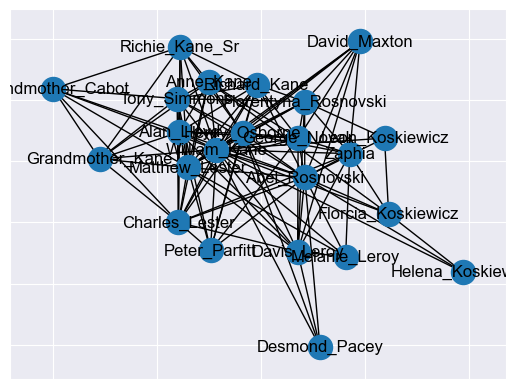

In [137]:
nx.draw_networkx(nx.ego_graph(G, n = "William_Kane"))

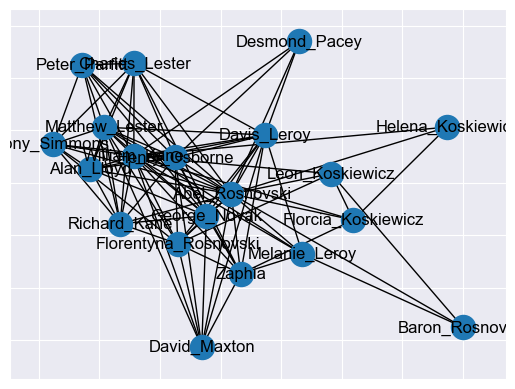

In [138]:
nx.draw_networkx(nx.ego_graph(G, n = "Abel_Rosnovski"))

The graph has a fairly high global clustering coefficient (>0.72) with many nodes having extremely high local clustering coefficients.
The average shortest path is also quite small (~1.5)

These two factors along with the dense ego networks of both our protagonists indicates that the characters in the book interact very closely with one another.

The presence of 4 communities and the relatively low clustering coefficient of the protagonists (~0.43 for both) tells us that these two characters act as points of contact between different clusters and that they themselves interact between all of the social communities of the book

***How are the clustering coefficient and transitivity of the nodes connected to each other?***

Clustering coefficient and transitivity are closely related. In our case both these values are relatively high (0.72 and 0.62 respectively). This indicates that not only are the nodes well connected to their neighbours' neighbours, but a node's neighbours are well connected amongst themselves

### c. Compare all the generated graphs (from (f)) to the actual graph. Is there a difference, and if yes, what can it be attributed to? Also, analyze the differences between the 3 generated graph’s attributes.

In [139]:
#comparing degrees
degree_actual = dict(G.degree())
degree_small_world = dict(Gsw.degree())
degree_preferential_attachment = dict(Gpa.degree())
degree_gnp = dict(Gnp.degree())
degree_gnm = dict(Gnm.degree())

print("Degree Distribution Comparison:")
print("Actual Graph:", sorted(degree_actual.values()))
print("Small World Model:", sorted(degree_small_world.values()))
print("Preferential Attachment Model:", sorted(degree_preferential_attachment.values()))
print("G(n,p) Model:", sorted(degree_gnp.values()))
print("G(n,m) Model:", sorted(degree_gnm.values()))
print()

Degree Distribution Comparison:
Actual Graph: [3, 3, 4, 5, 6, 6, 7, 8, 8, 8, 9, 10, 10, 11, 11, 12, 12, 12, 13, 14, 16, 17, 19, 22]
Small World Model: [2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 7]
Preferential Attachment Model: [2, 4, 7, 7, 7, 7, 7, 7, 8, 8, 9, 9, 9, 10, 11, 11, 12, 12, 13, 13, 14, 15, 17, 19]
G(n,p) Model: [7, 8, 9, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 13, 13, 14, 14, 16]
G(n,m) Model: [5, 7, 7, 7, 8, 8, 9, 9, 9, 9, 9, 10, 10, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14]



In [140]:
# Compare the clustering coefficient of the actual graph and the generated models
cc_actual = nx.average_clustering(G)
cc_small_world = nx.average_clustering(Gsw)
cc_preferential_attachment = nx.average_clustering(Gpa)
cc_gnp = nx.average_clustering(Gnp)
cc_gnm = nx.average_clustering(Gnm)

print("Clustering Coefficient Comparison:")
print("Actual Graph:", cc_actual)
print("Small World Model:", cc_small_world)
print("Preferential Attachment Model:", cc_preferential_attachment)
print("G(n,p) Model:", cc_gnp)
print("G(n,m) Model:", cc_gnm)
print()

Clustering Coefficient Comparison:
Actual Graph: 0.727966870662304
Small World Model: 0.16845238095238094
Preferential Attachment Model: 0.5619816554704326
G(n,p) Model: 0.47731308043808035
G(n,m) Model: 0.45508334258334265



In [141]:
# Compare the shortest path length of the actual graph and the generated models
spl_actual = nx.average_shortest_path_length(G)
spl_small_world = nx.average_shortest_path_length(Gsw)
spl_preferential_attachment = nx.average_shortest_path_length(Gpa)
spl_gnp = nx.average_shortest_path_length(Gnp)
spl_gnm = nx.average_shortest_path_length(Gnm)

print("Shortest Path Length Comparison:")
print("Actual Graph:", spl_actual)
print("Small World Model:", spl_small_world)
print("Preferential Attachment Model:", spl_preferential_attachment)
print("G(n,p) Model:", spl_gnp)
print("G(n,m) Model:", spl_gnm)

Shortest Path Length Comparison:
Actual Graph: 1.568840579710145
Small World Model: 2.282608695652174
Preferential Attachment Model: 1.576086956521739
G(n,p) Model: 1.5144927536231885
G(n,m) Model: 1.5543478260869565


From the above results, we can conclude through degree comparison and clustering comparison that none of the generated graphs come close to our actual graph.
However, the shortest path of our graph is almost equal to that of the Preferential Attachment model as well as the G(n,m) model, with G(n,p) not that far off.
Due to substantial variations in the other parameters, this can be considered as a mere coincidence.

The substantial difference between the generated graph models and the ground truth graph can be attributed to the complexity of the story. In an ideal case of a story with two protagonists, both the protagonists would belong to the same community, have the most interactions with each other, and have a very similar storyline. However, in our case, the two protagonists lead very different lives and influence a diverse set of people. But, even though they have very few direct interactions, they play a major part in each other's lives - by interacting with each other through their communities.

Thus, we theorize that such a complicated graph cannot be generated randomly, thereby leading to the difference between the generated graph models and our actual graph.

--------